### Chap7 Unsupervised Learning

#### Principle Components Analysis(PCA)

In [3]:
sp500_px <- read.csv('../psds_data/sp500_data.csv')
oil_px <- sp500_px[, c('CVX', 'XOM')]
str(oil_px)
head(oil_px, 3)

'data.frame':	5647 obs. of  2 variables:
 $ CVX: num  0.0729 0.1021 0.0292 0.0583 0.0443 ...
 $ XOM: num  -0.017 0.017 0.085 0.068 0.0344 ...


CVX,XOM
0.07292086,-0.01699089
0.10208921,0.01699089
0.02916834,0.08495444


In [8]:
pca <- princomp(oil_px)
pca

Call:
princomp(x = oil_px)

Standard deviations:
   Comp.1    Comp.2 
0.8820924 0.3007512 

 2  variables and  5647 observations.

In [9]:
pca$loadings


Loadings:
    Comp.1 Comp.2
CVX  0.747  0.665
XOM  0.665 -0.747

               Comp.1 Comp.2
SS loadings       1.0    1.0
Proportion Var    0.5    0.5
Cumulative Var    0.5    1.0

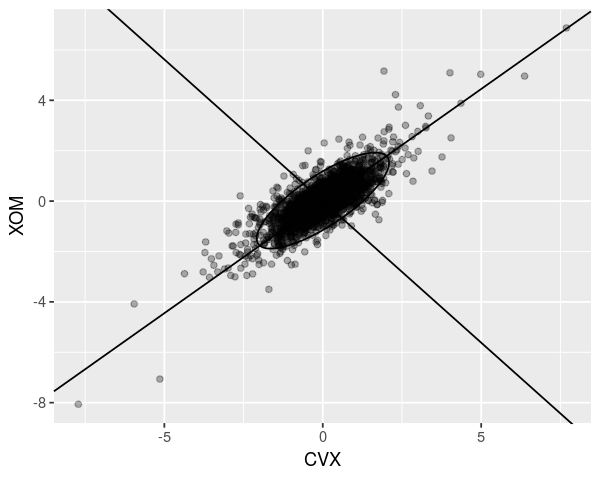

In [12]:
loadings <- pca$loadings
library(ggplot2)
options(repr.plot.width=5, repr.plot.height=4)
ggplot(data=oil_px, aes(x=CVX, y=XOM)) + 
    geom_point(alpha=0.3) + 
    stat_ellipse(type='norm', level=0.99) + 
    geom_abline(intercept=0, slope = loadings[2, 1] / loadings[1, 1]) + 
    geom_abline(intercept=0, slope = loadings[2, 2] / loadings[1, 2])    

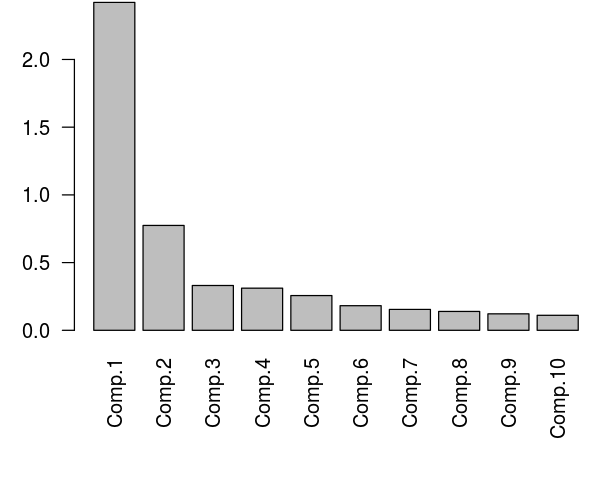

In [13]:
syms <- c( 'AAPL', 'MSFT', 'CSCO', 'INTC', 'CVX', 'XOM', 'SLB', 'COP',
           'JPM', 'WFC', 'USB', 'AXP', 'WMT', 'TGT', 'HD', 'COST')
top_cons <- sp500_px[row.names(sp500_px)>='2011-01-01', syms]
sp_pca <- princomp(top_cons)
par(mar=c(6,3,0,0)+.1, las=2)
screeplot(sp_pca, main='')

In [21]:
library(tidyr)
loadings = sp_pca$loadings[,1:5]
loadings <- as.data.frame(loadings)
loadings$Symbol <- row.names(loadings)
loadings <- gather(loadings, "Component", "Weight", -Symbol)
head(loadings)

Symbol,Component,Weight
AAPL,Comp.1,0.15091136
MSFT,Comp.1,0.10952467
CSCO,Comp.1,0.09945973
INTC,Comp.1,0.09474285
CVX,Comp.1,0.39309949
XOM,Comp.1,0.35451723


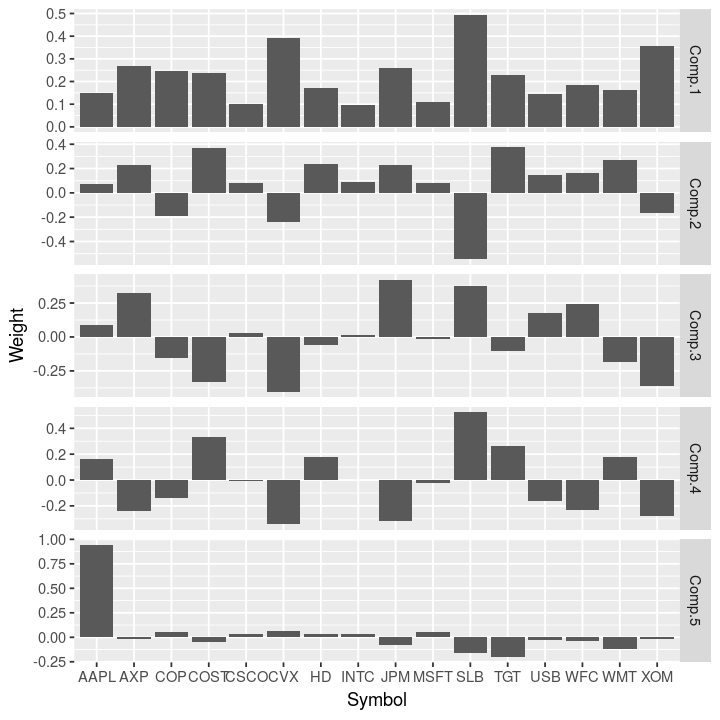

In [23]:
options(repr.plot.width=6, repr.plot.height=6)
ggplot(loadings, aes(x=Symbol, y=Weight)) + 
    geom_bar(stat='identity') + 
    facet_grid(Component ~ ., scales='free_y')

#### K-Means Clustering

In [25]:
set.seed(1010103)
df <- sp500_px[row.names(sp500_px)>='2011-01-01', c('XOM', 'CVX')]
km <- kmeans(df, centers=4, nstart=1)
str(km)

List of 9
 $ cluster     : Named int [1:4520] 1 1 1 1 1 1 1 1 1 1 ...
  ..- attr(*, "names")= chr [1:4520] "3" "4" "5" "6" ...
 $ centers     : num [1:4, 1:2] -0.097 -1.098 1.694 0.49 -0.12 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:4] "1" "2" "3" "4"
  .. ..$ : chr [1:2] "XOM" "CVX"
 $ totss       : num 4575
 $ withinss    : num [1:4] 398 518 279 284
 $ tot.withinss: num 1479
 $ betweenss   : num 3095
 $ size        : int [1:4] 2716 453 163 1188
 $ iter        : int 3
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


In [26]:
df$cluster <- factor(km$cluster)
head(df)

,XOM,CVX,cluster
3,0.08495444,0.02916834,1
4,0.06796355,0.05833669,1
5,0.03437781,0.04427162,1
6,-0.01718890,0.02951441,1
7,0.15470012,0.08854323,1
8,0.00000000,-0.02951441,1


In [27]:
centers <- data.frame(cluster=factor(1:4), km$centers)
centers

cluster,XOM,CVX
1,-0.0969933,-0.1202158
2,-1.0982621,-1.3310621
3,1.6939494,1.8699362
4,0.4898142,0.5514544


Warning message:
“Removed 99 rows containing missing values (geom_point).”

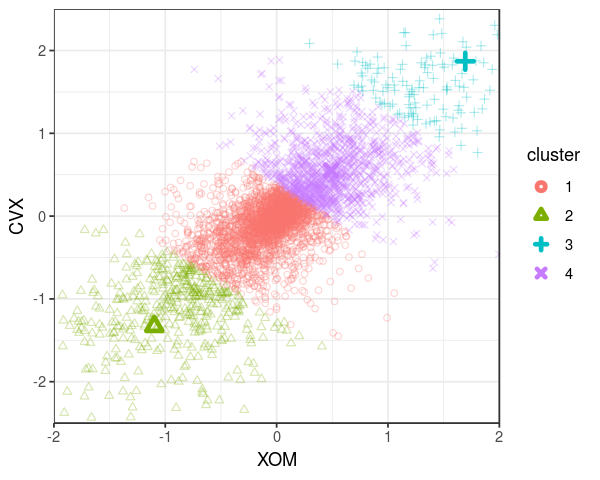

In [31]:
options(repr.plot.width=5, repr.plot.height=4)
ggplot(data=df, aes(x=XOM, y=CVX, color=cluster, shape=cluster)) +
  geom_point(alpha=.3) +
  scale_shape_manual(values = 1:4,
                     guide = guide_legend(override.aes=aes(size=1))) + 
  geom_point(data=centers,  aes(x=XOM, y=CVX), size=2, stroke=2)  +
  theme_bw() +
  scale_x_continuous(expand=c(0,0), lim=c(-2, 2)) + 
  scale_y_continuous(expand=c(0,0), lim=c(-2.5, 2.5)) 

In [33]:
syms <- c( 'AAPL', 'MSFT', 'CSCO', 'INTC', 'CVX', 'XOM', 'SLB', 'COP',
           'JPM', 'WFC', 'USB', 'AXP', 'WMT', 'TGT', 'HD', 'COST')
df <- sp500_px[row.names(sp500_px)>='2011-01-01', syms]

set.seed(10010)
km <- kmeans(df, centers=5, nstart=10)

In [34]:
km$size

[1]  861 2297  183  292  887

In [37]:
centers <- km$centers
centers <- as.data.frame(t(centers))
names(centers) <- paste("Cluster", 1:5)
centers$Symbol <- row.names(centers)
centers <- gather(centers, "Cluster", "Mean", -Symbol)
centers$Color = centers$Mean > 0
head(centers)

Symbol,Cluster,Mean,Color
AAPL,Cluster 1,-0.1822400,FALSE
MSFT,Cluster 1,-0.1644659,FALSE
CSCO,Cluster 1,-0.1839093,FALSE
INTC,Cluster 1,-0.1844095,FALSE
CVX,Cluster 1,-0.2333523,FALSE
XOM,Cluster 1,-0.2336868,FALSE


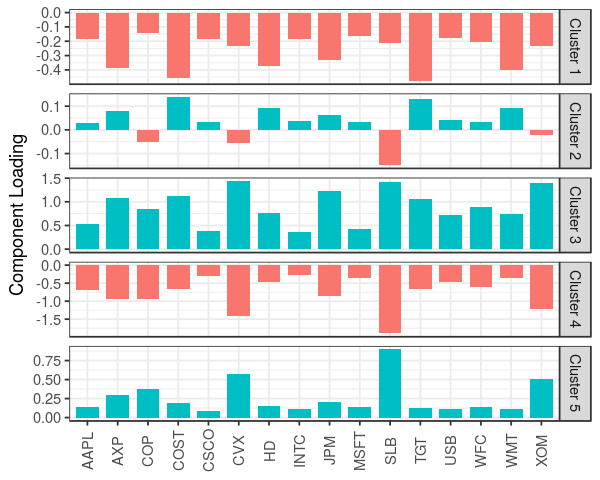

In [38]:
ggplot(centers, aes(x=Symbol, y=Mean, fill=Color)) +
  geom_bar(stat='identity', position = "identity", width=.75) + 
  facet_grid(Cluster ~ ., scales='free_y') +
  guides(fill=FALSE)  +
  ylab('Component Loading') +
  theme_bw() +
  theme(axis.title.x = element_blank(),
        axis.text.x  = element_text(angle=90, vjust=0.5))

In [39]:
pct_var <- data.frame(pct_var = 0,
                      num_clusters=2:14)
totalss <- kmeans(df, centers=14, nstart=50, iter.max = 100)$totss
for(i in 2:14){
  pct_var[i-1, 'pct_var'] <- kmeans(df, centers=i, 
                                    nstart=50, iter.max = 100)$betweenss/totalss
}

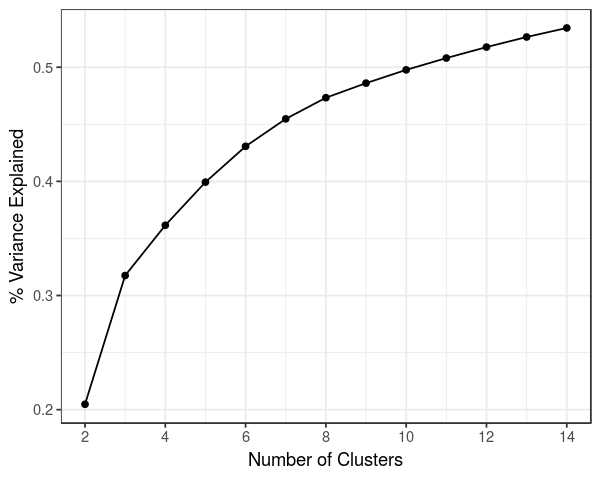

In [40]:
ggplot(pct_var, aes(x=num_clusters, y=pct_var)) +
  geom_line() +
  geom_point() +
  labs(y='% Variance Explained', x='Number of Clusters') +
  scale_x_continuous(breaks=seq(2, 14, by=2))   +
  theme_bw()

#### Hierarchical Clustering

In [41]:
syms1 <- c('GOOGL', 'AMZN', 'AAPL', 'MSFT', 'CSCO', 'INTC', 'CVX', 
           'XOM', 'SLB', 'COP', 'JPM', 'WFC', 'USB', 'AXP',
           'WMT', 'TGT', 'HD', 'COST')

df <- sp500_px[row.names(sp500_px)>='2011-01-01', syms1]
d <- dist(t(df))
hcl <- hclust(d)

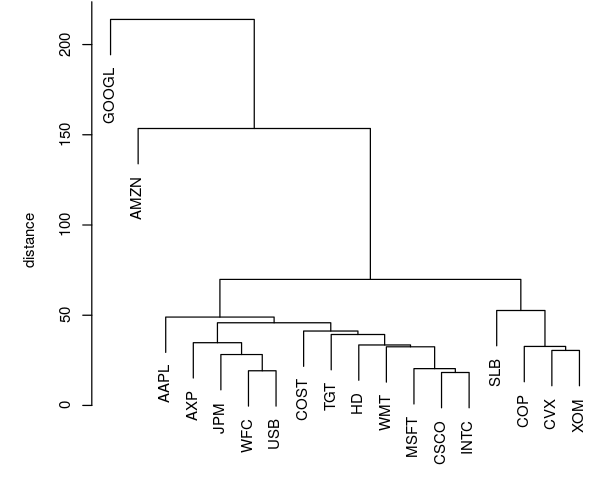

In [42]:
par(cex=.75, mar=c(0, 5, 0, 0)+.1)
plot(hcl, ylab='distance', xlab='', sub='', main='')

In [43]:
cutree(hcl, k=4)

GOOGL  AMZN  AAPL  MSFT  CSCO  INTC   CVX   XOM   SLB   COP   JPM   WFC   USB 
    1     2     3     3     3     3     4     4     4     4     3     3     3 
  AXP   WMT   TGT    HD  COST 
    3     3     3     3     3

#### Model-Based Clustering

In [45]:
library(mclust)
df <- sp500_px[row.names(sp500_px)>='2011-01-01', c('XOM', 'CVX')]
mcl <- Mclust(df)
summary(mcl)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VVE (ellipsoidal, equal orientation) model with 4 components: 

 log-likelihood    n df       BIC       ICL
      -5627.033 4520 20 -11422.39 -14948.11

Clustering table:
   1    2    3    4 
2085 1170 1178   87 

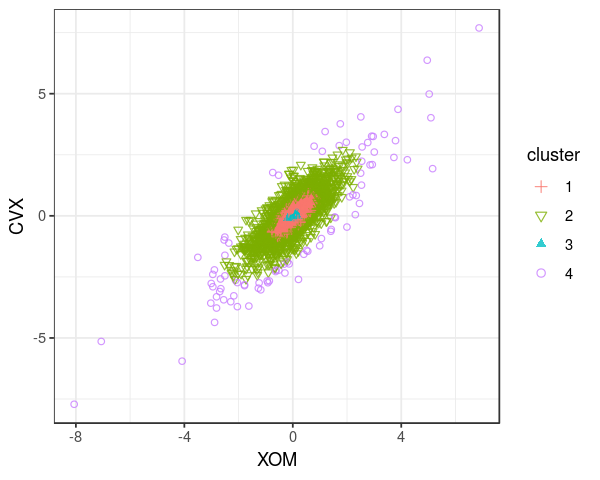

In [52]:
cluster <- factor(predict(mcl)$classification)
ggplot(data=df, aes(x=XOM, y=CVX, color=cluster, shape=cluster)) +
  geom_point(alpha=.8) +
  theme_bw() +
  scale_shape_manual(values = c(3, 6, 17, 1),
                     guide = guide_legend(override.aes=aes(size=2))) 

In [57]:
summary(mcl, parameters=TRUE)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VVE (ellipsoidal, equal orientation) model with 4 components: 

 log-likelihood    n df       BIC       ICL
      -5627.033 4520 20 -11422.39 -14948.11

Clustering table:
   1    2    3    4 
2085 1170 1178   87 

Mixing probabilities:
         1          2          3          4 
0.42102839 0.32414239 0.21427623 0.04055299 

Means:
          [,1]        [,2]        [,3]        [,4]
XOM 0.03404058 0.004380928 0.012961411  0.07263227
CVX 0.02513265 0.008874133 0.008216287 -0.20915473

Variances:
[,,1]
          XOM       CVX
XOM 0.1600320 0.1336138
CVX 0.1336138 0.1917168
[,,2]
          XOM       CVX
XOM 0.6895853 0.5852195
CVX 0.5852195 0.8283625
[,,3]
            XOM         CVX
XOM 0.012788757 0.006407938
CVX 0.006407938 0.014308316
[,,4]
         XOM      CVX
XOM 4.027796 3.864467
CVX 3.864467 4.944204

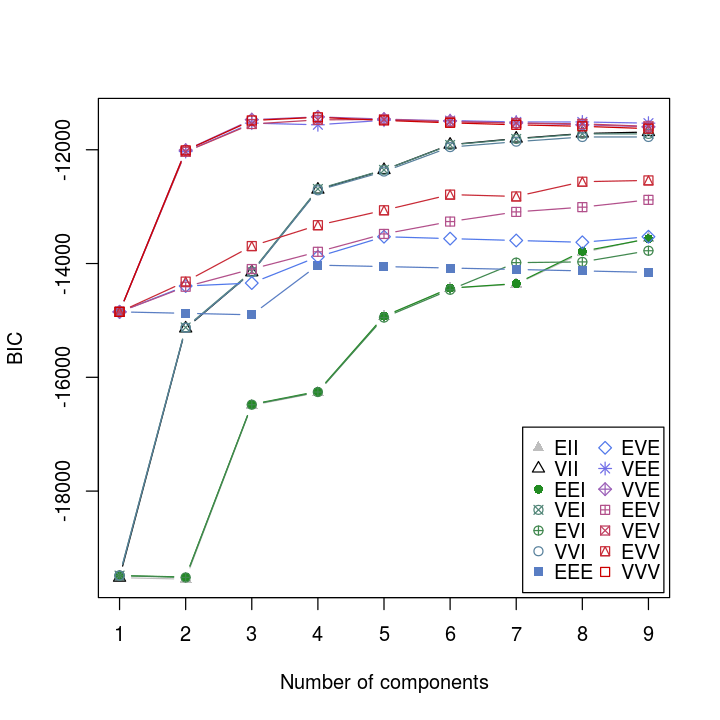

In [59]:
options(repr.plot.width=6, repr.plot.height=6)
plot(mcl, what='BIC', ask=FALSE)

#### Scaling and Categorical Variables

##### Scaling the variables

In [61]:
loan_data <- read.csv('../psds_data/loan_data.csv')
defaults <- loan_data[loan_data$outcome=='default',]
df <- defaults[, c('loan_amnt', 'annual_inc', 'revol_bal', 'open_acc', 'dti', 'revol_util')]
km <- kmeans(df, centers=4, nstart=10)
centers <- data.frame(size=km$size, km$centers) 
round(centers, digits=2)

size,loan_amnt,annual_inc,revol_bal,open_acc,dti,revol_util
1221,21797.26,164503.32,38652.54,12.61,13.53,63.65
13819,10577.04,42380.98,10245.27,9.58,17.71,58.09
7579,18247.71,83069.61,19587.30,11.66,16.79,62.26
52,22570.19,489783.40,85161.35,13.33,6.91,59.65


In [62]:
df0 <- scale(df)
km0 <- kmeans(df0, centers=4, nstart=10)
centers0 <- scale(km0$centers, center=FALSE, scale=1/attr(df0, 'scaled:scale'))
centers0 <- scale(centers0, center=-attr(df0, 'scaled:center'), scale=FALSE)
centers0 <- data.frame(size=km0$size, centers0) 
round(centers0, digits=2)

size,loan_amnt,annual_inc,revol_bal,open_acc,dti,revol_util
7352,10469.59,51133.67,11525.60,7.47,15.79,77.73
3714,25892.49,116181.28,32800.82,12.41,16.22,66.15
6295,13360.69,55586.28,16367.36,14.24,24.23,59.60
5310,10359.51,53526.74,6038.37,8.68,11.31,30.72


##### Dominant Variables

In [63]:
syms <- c('GOOGL', 'AMZN', 'AAPL', 'MSFT', 'CSCO', 'INTC', 'CVX', 'XOM', 
          'SLB', 'COP', 'JPM', 'WFC', 'USB', 'AXP', 'WMT', 'TGT', 'HD', 'COST')
top_15 <- sp500_px[row.names(sp500_px)>='2011-01-01', syms]
sp_pca1 <- princomp(top_15)

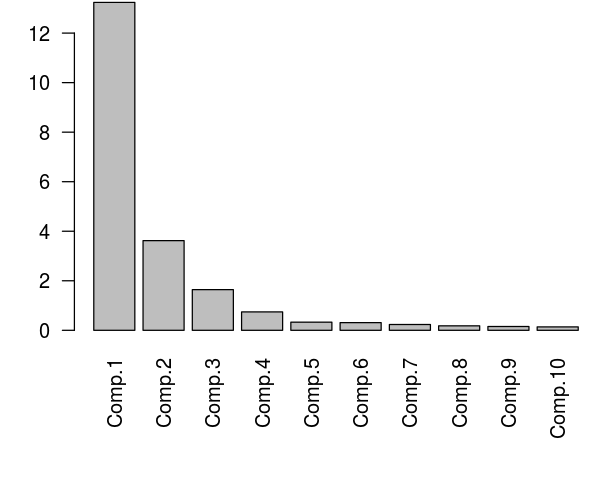

In [66]:
options(repr.plot.width=5, repr.plot.height=4)
par(mar=c(6,3,0,0)+.1, las=2)
screeplot(sp_pca1, main='')

In [65]:
round(sp_pca1$loadings[,1:2], 3)

,Comp.1,Comp.2
GOOGL,0.854,0.487
AMZN,0.448,-0.867
AAPL,0.071,-0.020
MSFT,0.037,-0.013
CSCO,0.031,-0.013
INTC,0.029,-0.016
CVX,0.090,-0.041
XOM,0.081,-0.026
SLB,0.111,-0.034
COP,0.058,-0.026


##### Categorical Data and Grower's Distance

In [67]:
x <- loan_data[1:5, c('dti', 'payment_inc_ratio', 'home_', 'purpose_')]
x

dti,payment_inc_ratio,home_,purpose_
1.00,2.39320,RENT,major_purchase
5.55,4.57170,OWN,small_business
18.08,9.71600,RENT,other
10.08,12.21520,RENT,debt_consolidation
7.06,3.90888,RENT,other


In [69]:
library(cluster)
daisy(x, metric='gower')

Dissimilarities :
          1         2         3         4
2 0.6220479                              
3 0.6863877 0.8143398                    
4 0.6329040 0.7608561 0.4307083          
5 0.3772789 0.5389727 0.3091088 0.5056250

Metric :  mixed ;  Types = I, I, N, N 
Number of objects : 5

In [72]:
set.seed(301)
df <- loan_data[sample(nrow(loan_data), 250),
                c('dti', 'payment_inc_ratio', 'home_', 'purpose_')]
d = daisy(df, metric='gower')
hcl <- hclust(d)
dnd <- as.dendrogram(hcl)

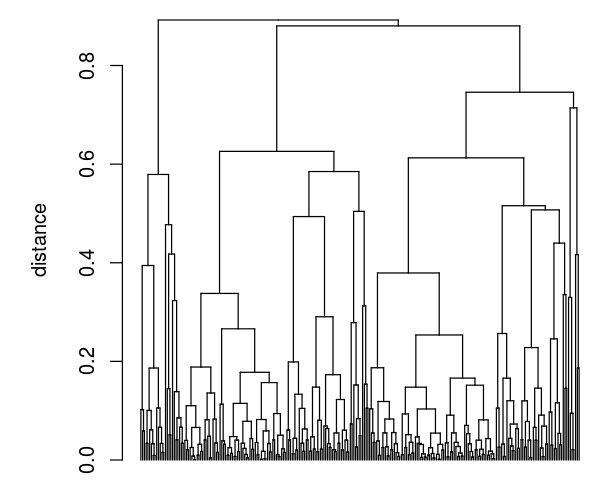

In [73]:
par(mar=c(0,5,0,0)+.1)
plot(dnd, leaflab='none', ylab='distance')

In [74]:
dnd_cut <- cut(dnd, h=.5)
df[labels(dnd_cut$lower[[1]]),]

,dti,payment_inc_ratio,home_,purpose_
7565,26.72,10.29240,OWN,other
36140,20.16,11.73840,OWN,other
20974,21.63,16.12230,OWN,other
44532,21.22,8.37694,OWN,debt_consolidation
39826,22.59,6.22827,OWN,debt_consolidation
13282,31.00,9.64200,OWN,debt_consolidation
31510,26.21,11.94380,OWN,debt_consolidation
6693,26.96,9.45600,OWN,debt_consolidation
7356,25.81,9.39257,OWN,debt_consolidation
9278,21.00,14.71850,OWN,debt_consolidation


##### Problems with Clustering Mixed Data